In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
from pandas import Series, DataFrame

In [3]:
data = pd.read_csv("D:/ClassNotes_BA/Data_mining/titanic-training-data.csv")
data.shape

(891, 12)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data["Embarked"].value_counts(ascending=False)

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
data.drop(["Name","Ticket","Cabin"],inplace=True,axis=1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [8]:
data.isnull().sum()/len(data)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

In [9]:
data["Age"].mean()

29.69911764705882

In [10]:
data["Age"].groupby(data["Pclass"]).mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [11]:
data["Age"].groupby(data["Sex"]).mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [12]:
data["Age"].groupby(data["SibSp"]).mean()

SibSp
0    31.397558
1    30.089727
2    22.620000
3    13.916667
4     7.055556
5    10.200000
8          NaN
Name: Age, dtype: float64

In [13]:
Parch_age_group=data["Age"].groupby(data["Parch"]).mean()

In [14]:
for row in range(1,len(data)):
    data.at[row,"Age"]=np.where(pd.isnull(data.at[row,"Age"]),Parch_age_group.loc[(Parch_age_group.index==data.at[row,"Parch"]),],data.at[row,"Age"])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [16]:
data["Age"].mean()

29.920509419968443

In [17]:
data["Age"].groupby(data["Parch"]).mean()

Parch
0    32.178503
1    24.422000
2    17.216912
3    33.200000
4    44.500000
5    39.200000
6    43.000000
Name: Age, dtype: float64

In [18]:
Parch_age_group

Parch
0    32.178503
1    24.422000
2    17.216912
3    33.200000
4    44.500000
5    39.200000
6    43.000000
Name: Age, dtype: float64

In [19]:
data_Gender=pd.get_dummies(data.Sex,prefix="Sex")
data_Gender.head()


,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [20]:
data_Embarked=pd.get_dummies(data.Embarked,prefix="Embarked")
data_Embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [21]:
data1=pd.concat([data,data_Gender,data_Embarked],axis=1)
data1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1


In [22]:
data1.drop(["Sex","Embarked"],axis=1,inplace=True)

In [23]:
data1.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X=data1.assign(cont=1)
pd.Series([variance_inflation_factor(X.values,i)
           for i in range(X.shape[1])],
          index=X.columns)

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


PassengerId     1.007865
Survived        1.661554
Pclass          1.920256
Age             1.313943
SibSp           1.331411
Parch           1.339976
Fare            1.651256
Sex_female           inf
Sex_male             inf
Embarked_C     69.661735
Embarked_Q     36.668930
Embarked_S     90.893119
cont            0.000000
dtype: float64

In [25]:
data1.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [26]:
X_data=data1.drop("Survived",axis=1)
y_data= data1["Survived"]

In [27]:
print(X_data.shape)
print(y_data.shape)

(891, 11)
(891,)


In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.2)

In [54]:
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [55]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [56]:
confusion_matrix(y_test,y_pred)

array([[97, 15],
       [21, 46]], dtype=int64)

In [57]:
accuracy_score(y_test,y_pred)

0.7988826815642458

In [58]:
precision_score(y_test,y_pred)

0.7540983606557377

In [59]:
from sklearn.naive_bayes import MultinomialNB
MultiNB= MultinomialNB()
MultiNB.fit(X_train,y_train)
y_pred=MultiNB.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

[[84 28]
 [37 30]]
0.6368715083798883
0.5172413793103449


In [60]:
confusion_matrix(y_test,y_pred)

array([[84, 28],
       [37, 30]], dtype=int64)

In [61]:
from sklearn.model_selection import cross_val_predict

In [62]:
cross_pred=cross_val_predict(clf,X_data,y_data,cv=10)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

In [63]:
print(confusion_matrix(y_data,cross_pred))
print(accuracy_score(y_data,cross_pred))
print(precision_score(y_data,cross_pred))

[[476  73]
 [115 227]]
0.7890011223344556
0.7566666666666667


In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
classifier = RandomForestClassifier()

In [66]:
classifier.fit(X_train,y_train)
y_classifier=classifier.predict(X_test)

In [67]:
print(confusion_matrix(y_test,y_classifier))
print(accuracy_score(y_test,y_classifier))
print(precision_score(y_test,y_classifier))

[[95 17]
 [19 48]]
0.7988826815642458
0.7384615384615385


In [68]:
y_cross_pred=cross_val_predict(classifier,X_data,y_data,cv=10)
print(confusion_matrix(y_data,y_cross_pred))
print(accuracy_score(y_data,y_cross_pred))
print(precision_score(y_data,y_cross_pred))

[[489  60]
 [ 99 243]]
0.8215488215488216
0.801980198019802


In [69]:
import sklearn.metrics as metrics

In [70]:
proba= classifier.predict_proba(X_test)
pred=proba[:,1]

In [71]:
fpr,tpr,threshold=metrics.roc_curve(y_test,pred)

In [72]:
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.8615405117270789

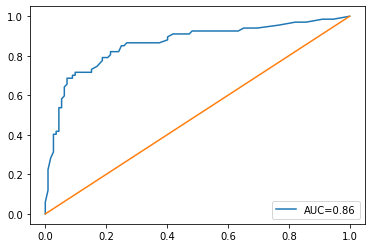

In [73]:
plt.plot(fpr,tpr,label="AUC=%0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1])

In [77]:
from sklearn.model_selection import GridSearchCV
clf=LogisticRegression()
grid_values={'penality':["l1","l2"],'C':[0.001,0.01,0.1,1,10,100],'solver':['warn','liblinear']}
grid_clf_acc=GridSearchCV(clf,param_grid=grid_values,scoring="accuracy",verbose=10,cv=5)
grid_clf_acc.fit(X_train,y_train)
grid_clf_acc.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=0.001, penality=l1, solver=warn ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: Invalid parameter penality for estimator LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.